In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.font_manager as font_manager
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
state_df = pd.read_csv('StatewiseTestingDetails.csv')
country_df = pd.read_csv('covid_19_india.csv')
vaccine_df = pd.read_csv('covid_vaccine_statewise.csv')

In [3]:
state_df[state_df['State']=='Tamil Nadu'].head()

Date       State  TotalSamples Negative  Positive
10733  2020-04-03  Tamil Nadu        3684.0     2789     411.0
10734  2020-04-08  Tamil Nadu        5305.0     4414     690.0
10735  2020-04-09  Tamil Nadu        7267.0     5824     834.0
10736  2020-04-10  Tamil Nadu        8410.0     6838     911.0
10737  2020-04-11  Tamil Nadu        9842.0     7779     969.0

In [4]:
country_df[((country_df['Date']=='2020-04-04')&(country_df['State/UnionTerritory']=='Tamil Nadu'))]

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
643  644  2020-04-04  6:00 PM           Tamil Nadu                       -   

    ConfirmedForeignNational  Cured  Deaths  Confirmed  
643                        -      6       2        411

In [5]:
print("Minimum date :",country_df['Date'].min())
print("Maximum date :",country_df['Date'].max())

Minimum date : 2020-01-30
Maximum date : 2021-05-08


In [6]:
#Copying the contry_df data to df for easy reference
df=country_df.copy()

In [7]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
#Check data types of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14690 entries, 0 to 14689
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       14690 non-null  int64 
 1   Date                      14690 non-null  object
 2   Time                      14690 non-null  object
 3   State/UnionTerritory      14690 non-null  object
 4   ConfirmedIndianNational   14690 non-null  object
 5   ConfirmedForeignNational  14690 non-null  object
 6   Cured                     14690 non-null  int64 
 7   Deaths                    14690 non-null  int64 
 8   Confirmed                 14690 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


In [9]:
df.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [10]:
#lets convert the Date feature to Date&time datatype
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

#Time is not required as it doesnt make much difference
df.drop(['Time'],axis=1, inplace=True)

#Renaming State/UnionTerritory to States for easy reference
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

In [11]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

In [12]:
df[df['States']=='Tamil Nadu'].tail()

Sno       Date      States ConfirmedIndianNational  \
14540  14541 2021-05-04  Tamil Nadu                       -   
14576  14577 2021-05-05  Tamil Nadu                       -   
14612  14613 2021-05-06  Tamil Nadu                       -   
14648  14649 2021-05-07  Tamil Nadu                       -   
14684  14685 2021-05-08  Tamil Nadu                       -   

      ConfirmedForeignNational    Cured  Deaths  Confirmed  Active_cases  
14540                        -  1090338   14468    1228064        123258  
14576                        -  1109450   14612    1249292        125230  
14612                        -  1129512   14779    1272602        128311  
14648                        -  1151058   14974    1297500        131468  
14684                        -  1173439   15171    1323965        135355

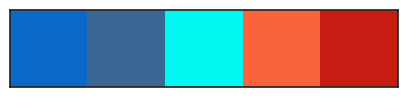

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

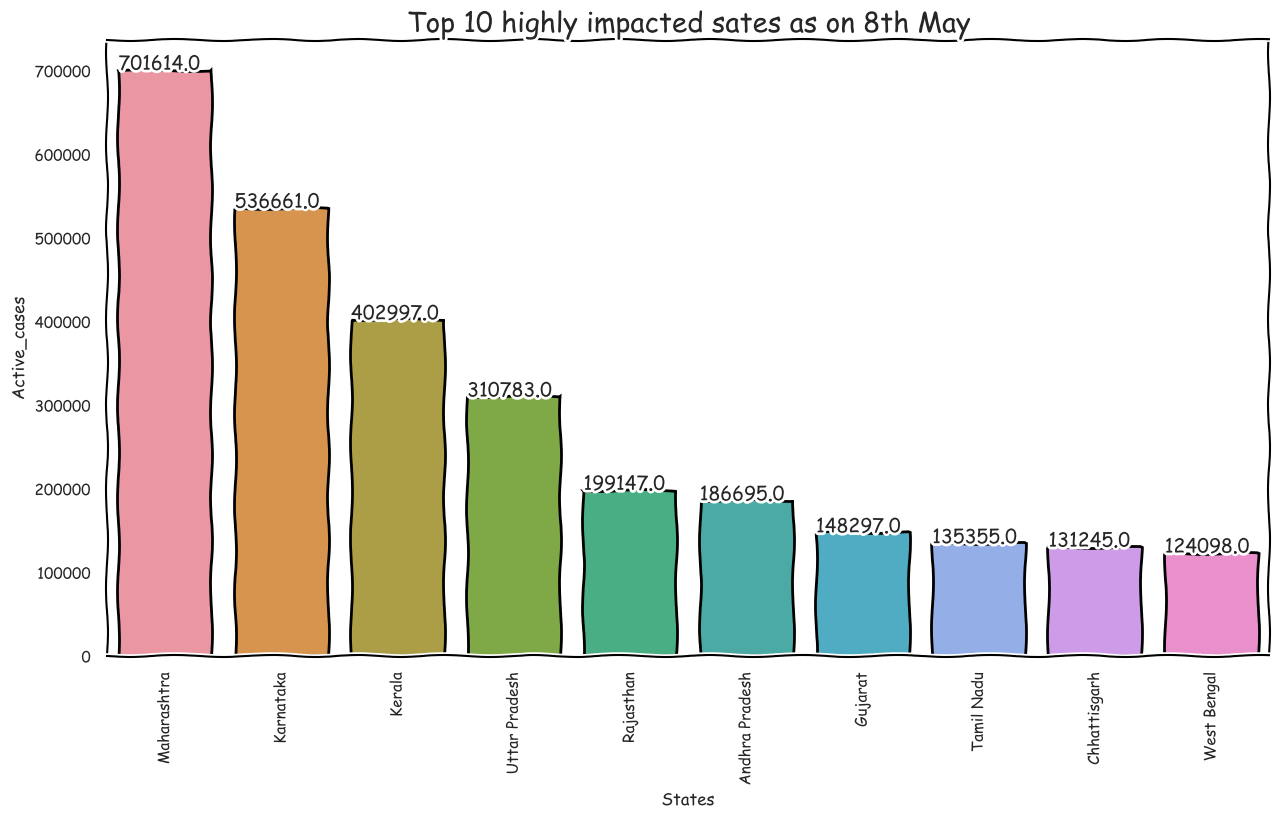

In [14]:
top_10=df.groupby(by='States').max()[['Active_cases','Date']].sort_values(by=['Active_cases'],ascending=False).reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Top 10 highly impacted sates as on 8th May", size=20)
    ax=sns.barplot(data=top_10.iloc[:10],y='Active_cases',x='States', linewidth=2, edgecolor='black')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

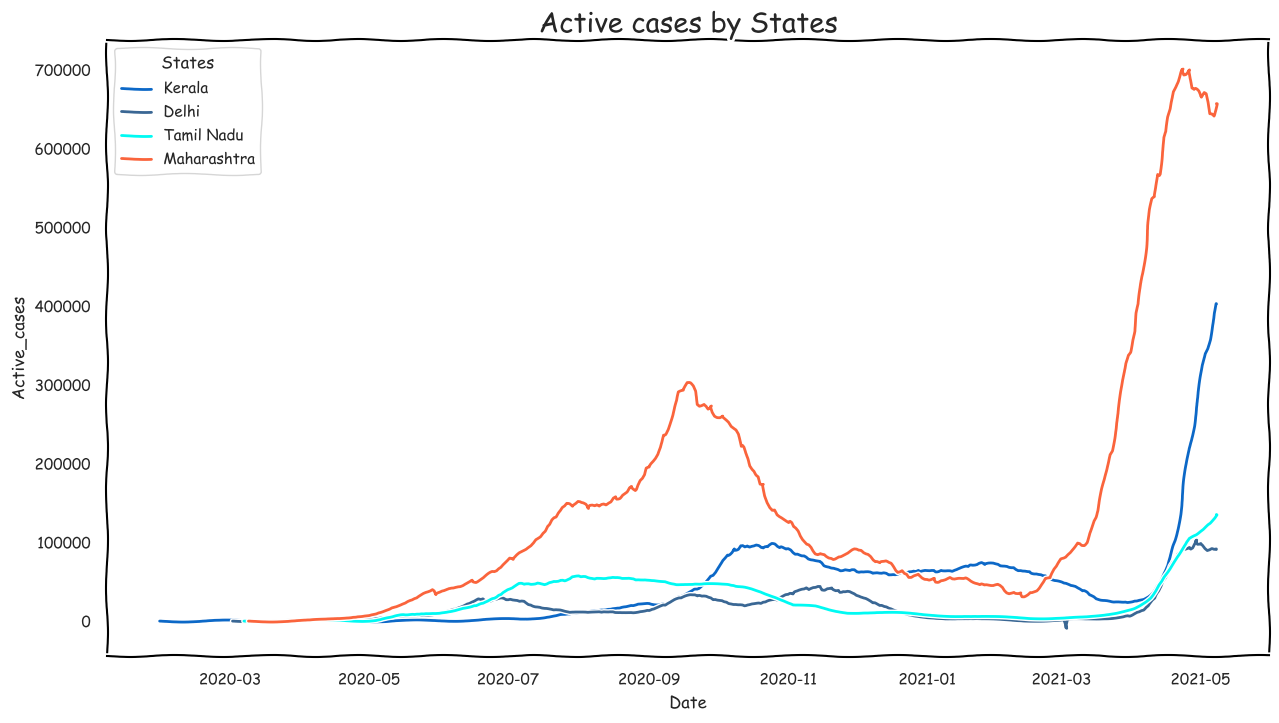

In [15]:


fig=plt.figure(figsize=(15,8))
with plt.xkcd():
    ax=sns.lineplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Date',y='Active_cases',hue='States')
    ax.set_title("Active cases by States", size=20)
   
    



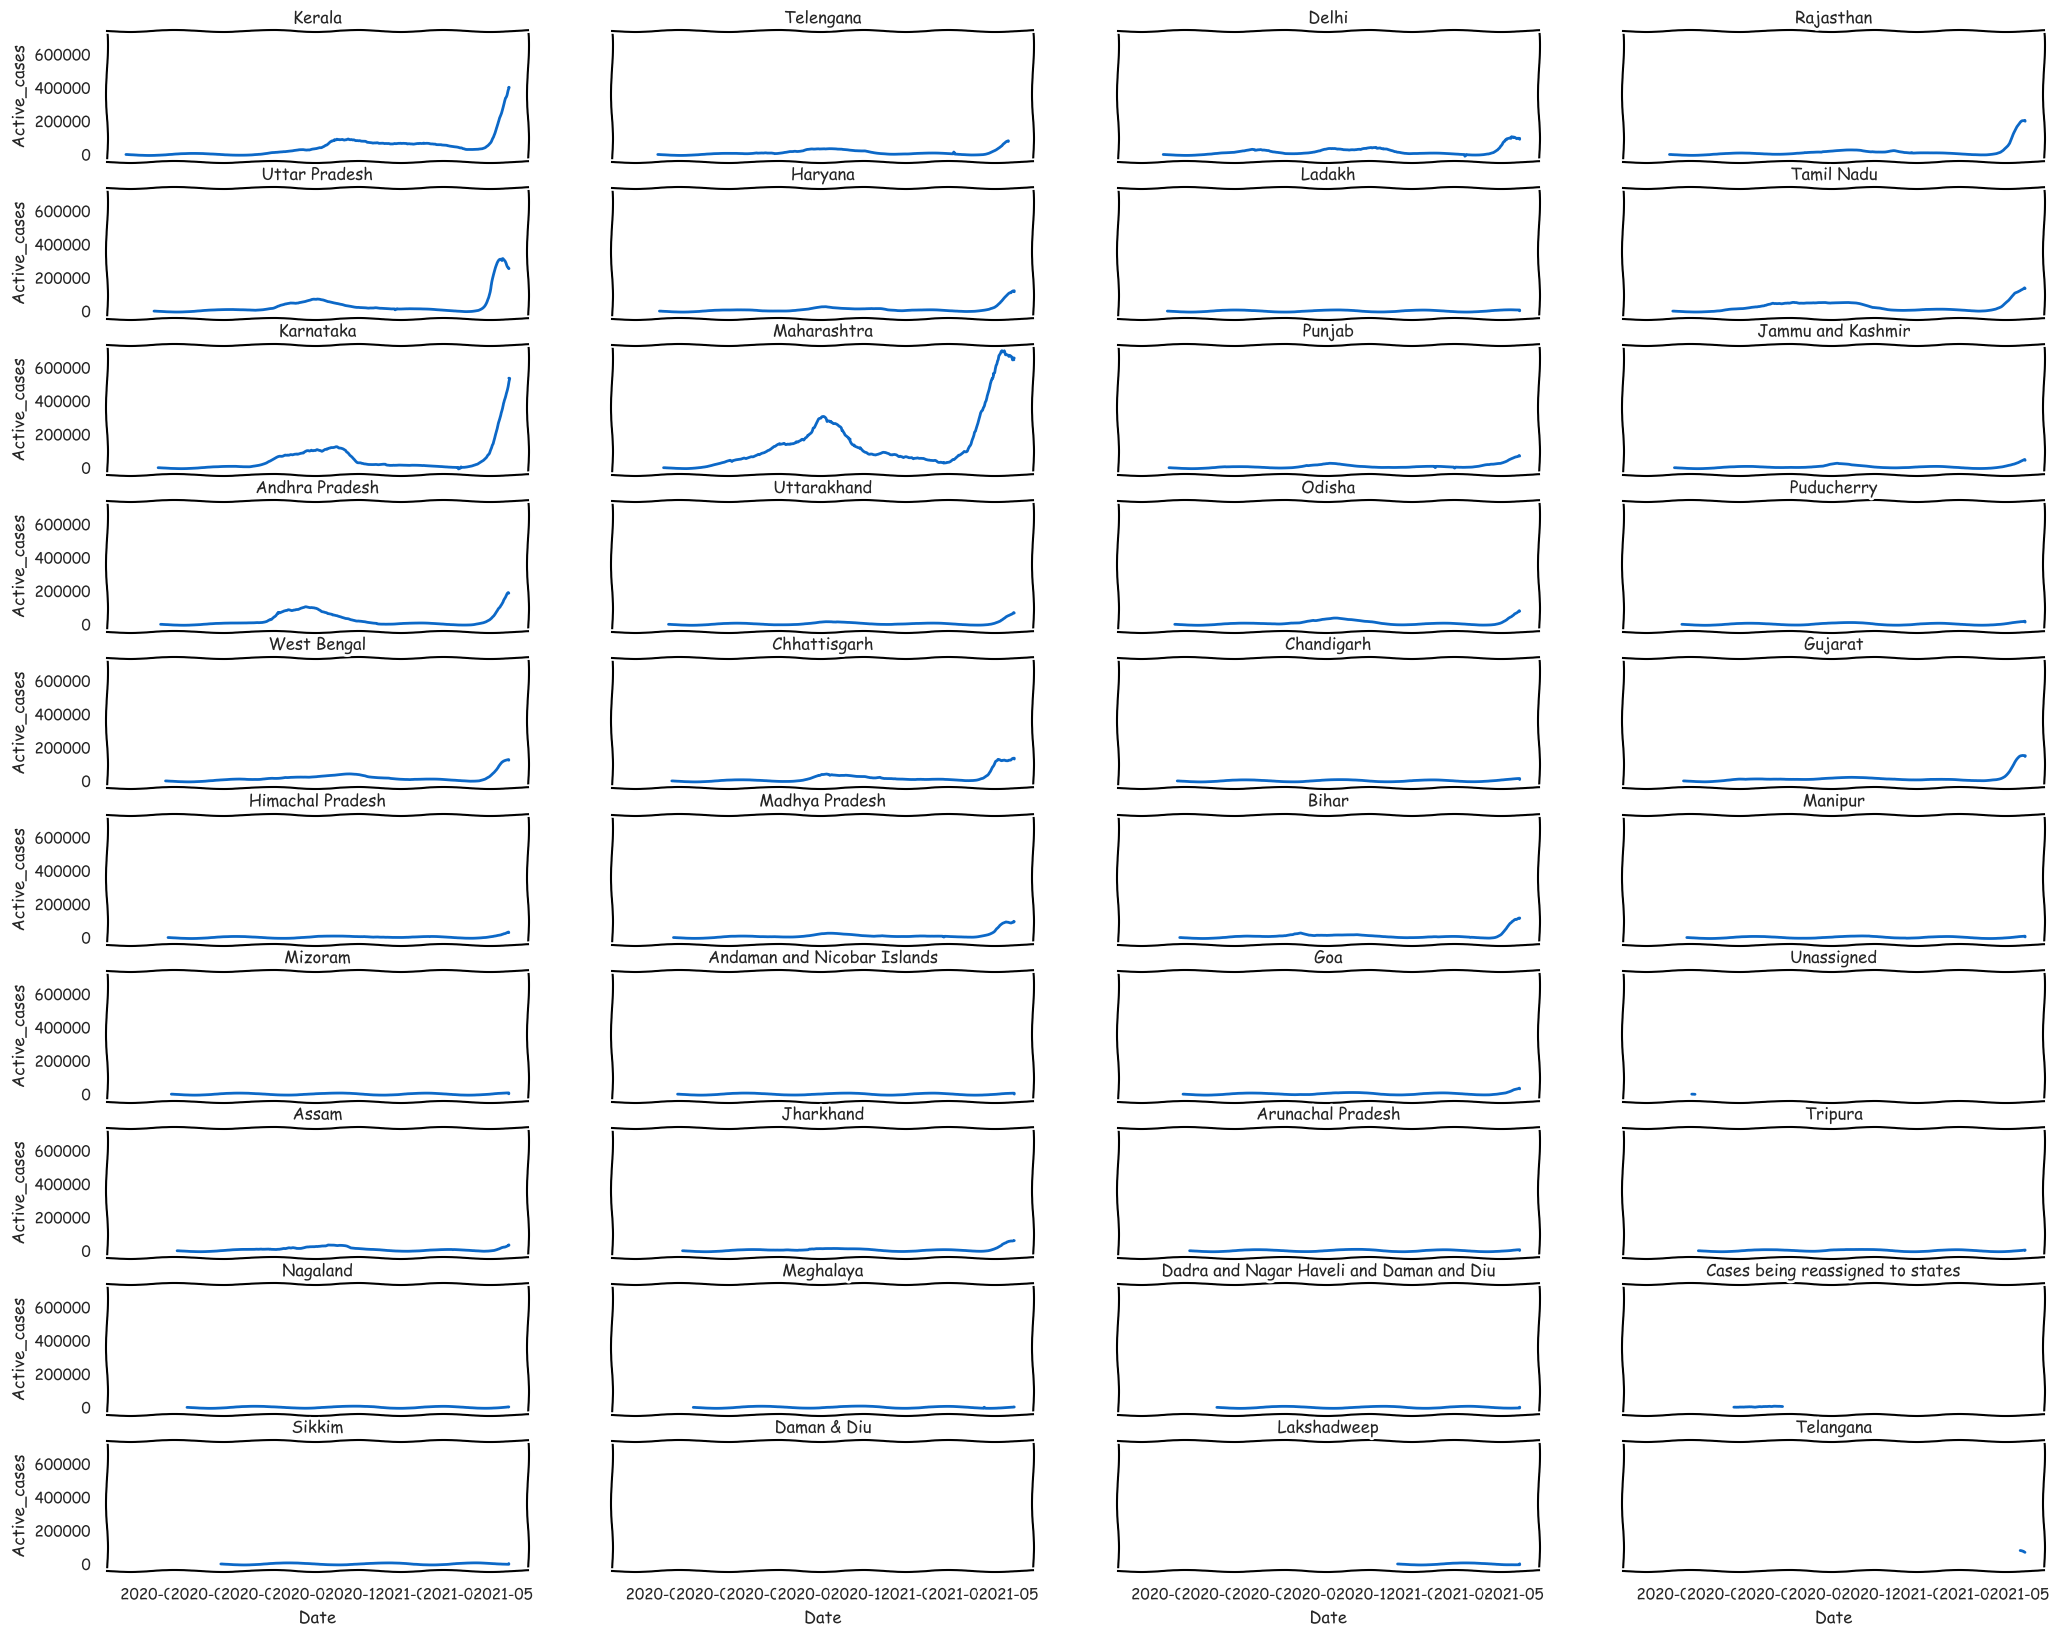

In [16]:
with plt.xkcd():
    fig, ax=plt.subplots(nrows=10, ncols=4, figsize=[25,20], sharex=True, sharey=True)
    ax=ax.flatten()

    for i,s in enumerate(df['States'].unique()):
        data1=df[df['States']==s][['Date','Active_cases']]
        sns.lineplot(data=data1, x='Date',y='Active_cases', ax=ax[i])
        ax[i].set_title(s)

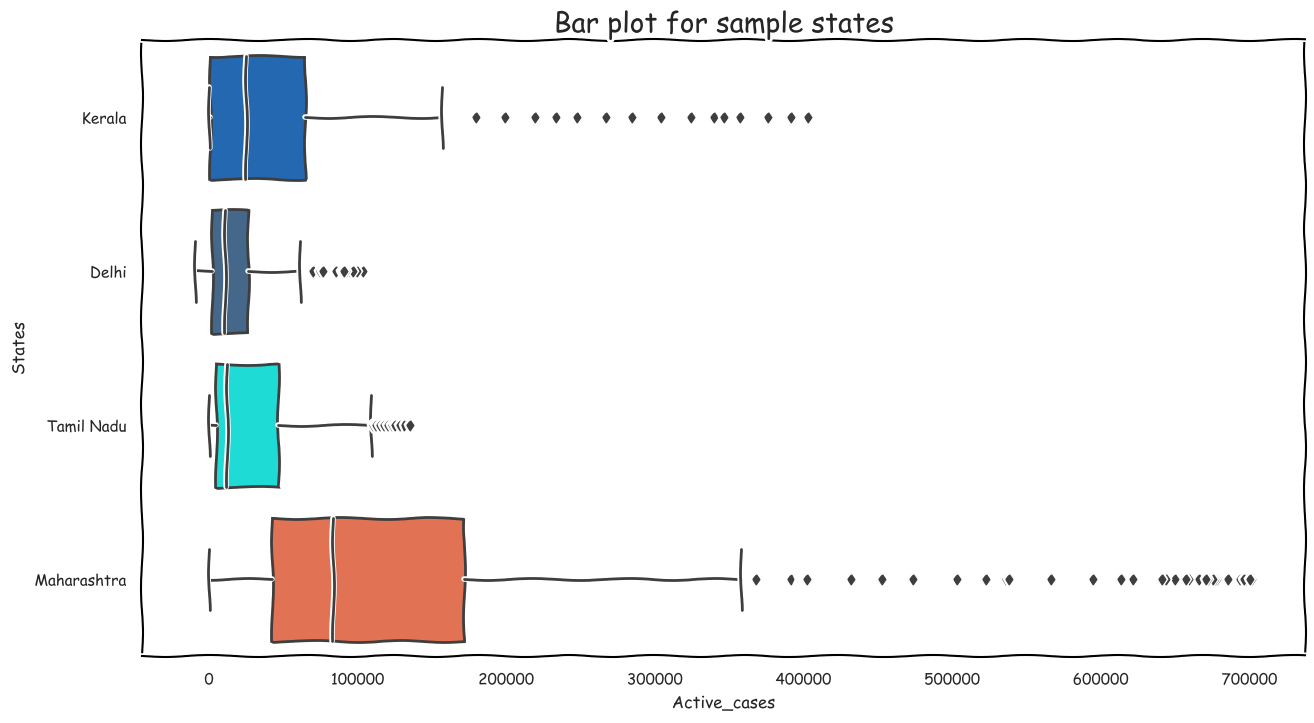

In [17]:


with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Active_cases',y='States')
    plt.title("Bar plot for sample states" ,size=20)



In [18]:
median_states=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])]
median_states.groupby(by=['States']).median().style.bar(['Active_cases'])

C:\Users\vibi\AppData\Local\Temp\ipykernel_6328\4240229378.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_states.groupby(by=['States']).median().style.bar(['Active_cases'])


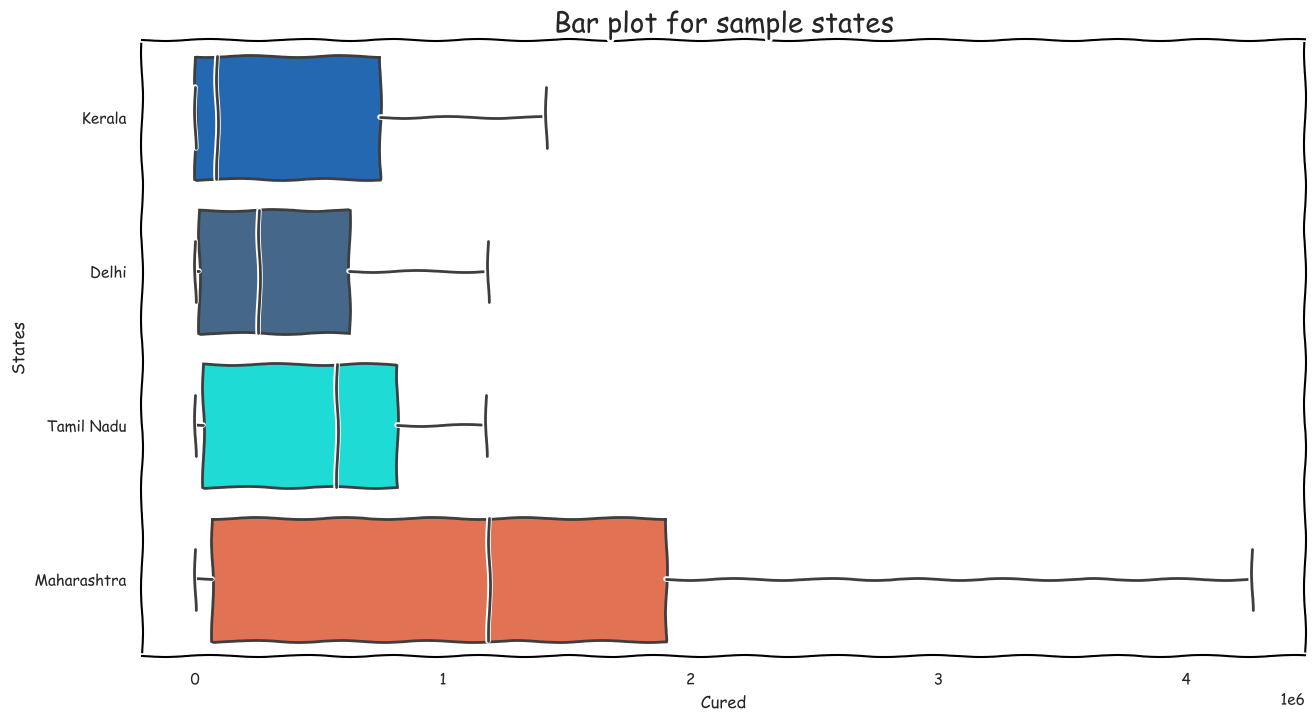

In [19]:


with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Cured',y='States')
    plt.title("Bar plot for sample states" ,size=20)



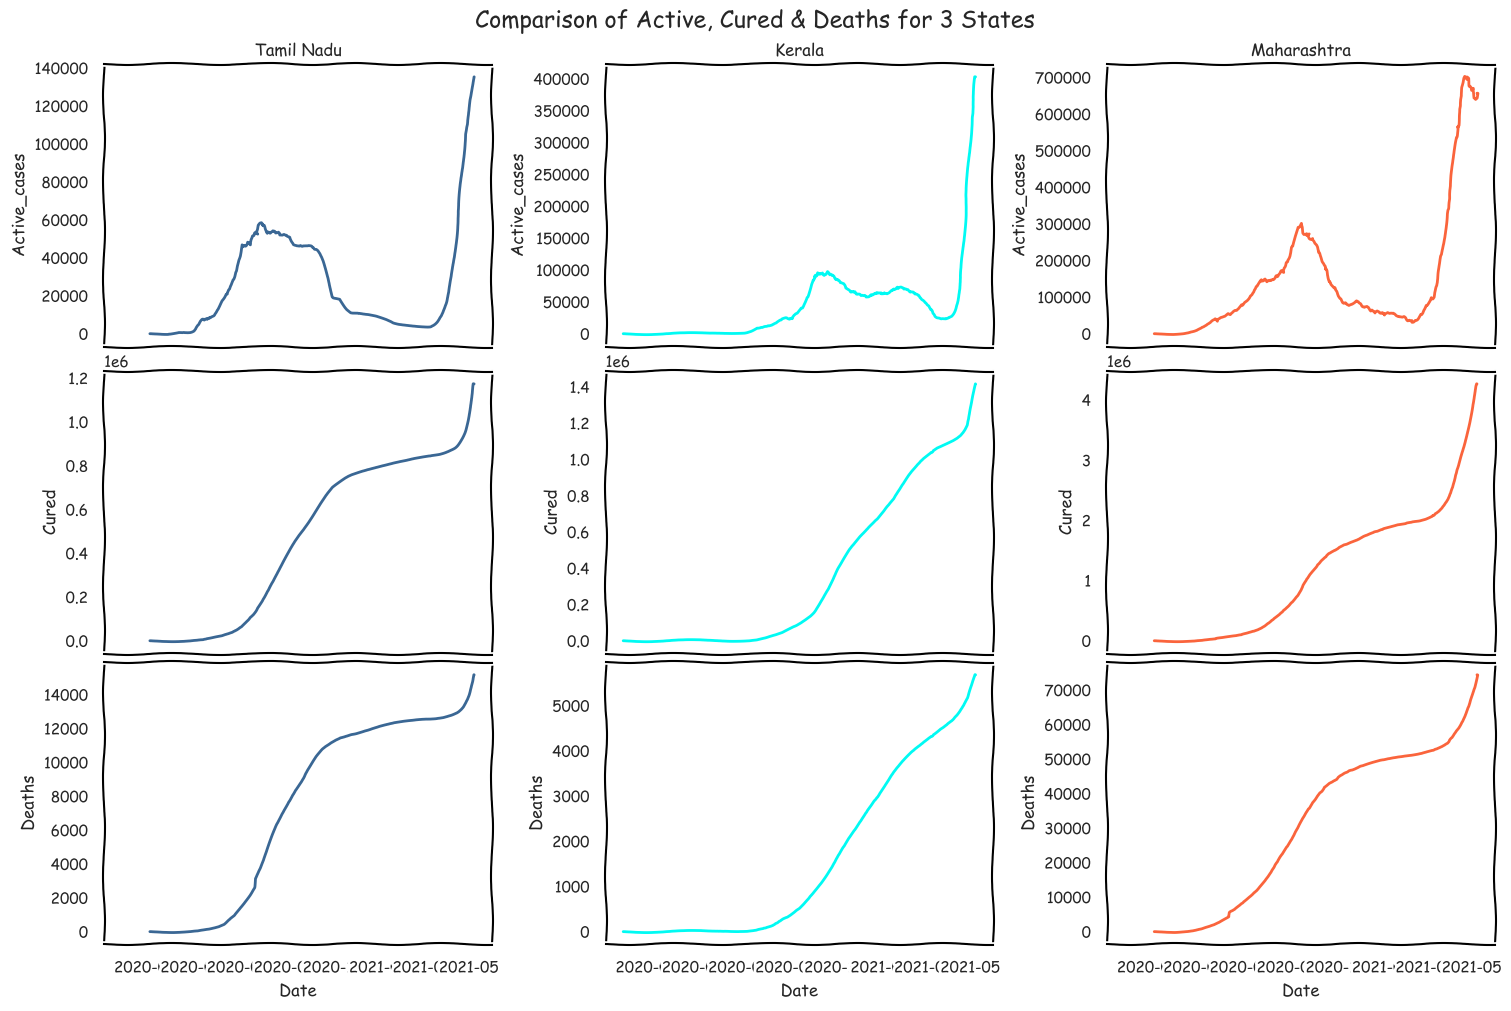

In [20]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']

with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
    plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")
    sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
    ax[0,0].set_title("Tamil Nadu")
    sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
    sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

    sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
    ax[0,1].set_title("Kerala")
    sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
    sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

    sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
    ax[0,2].set_title("Maharashtra")
    sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
    sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])



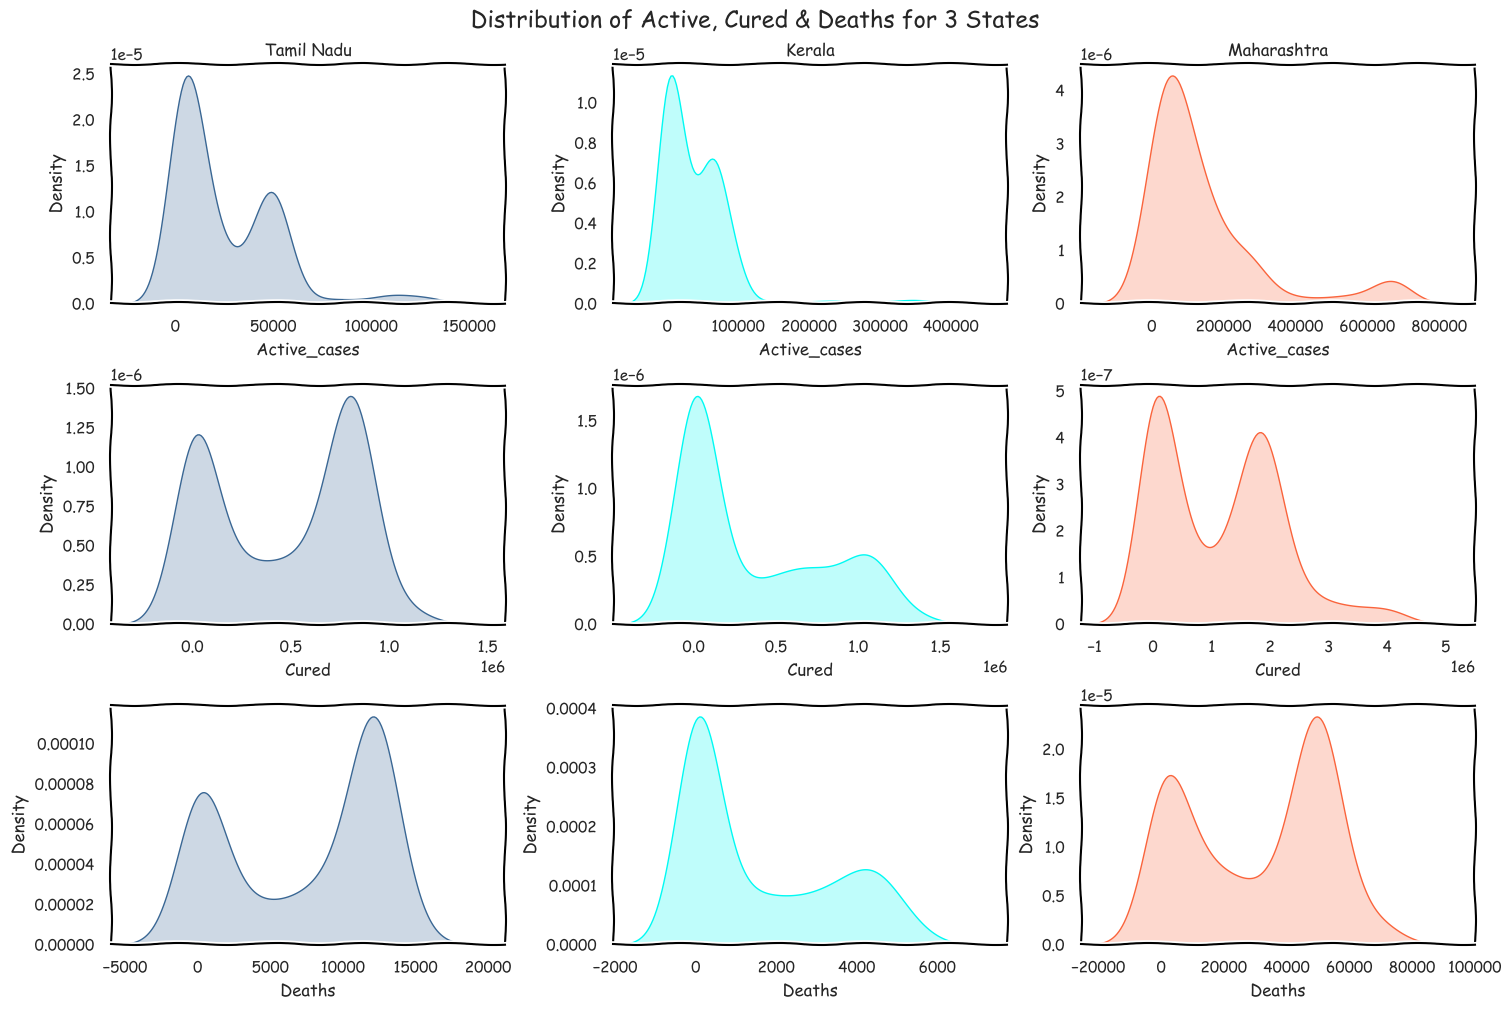

In [21]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']

with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=False, sharey=False, constrained_layout=True )
    plt.suptitle("Distribution of Active, Cured & Deaths for 3 States")
    sns.kdeplot(data=tn['Active_cases'],ax=ax[0,0],color=colors[1], fill=True)
    ax[0,0].set_title("Tamil Nadu")
    sns.kdeplot(data=tn['Cured'],  ax=ax[1,0],color=colors[1],fill=True)
    sns.kdeplot(data=tn['Deaths'], ax=ax[2,0], color=colors[1],fill=True)

    sns.kdeplot(data=kl['Active_cases'], ax=ax[0,1], color=colors[2],fill=True)
    ax[0,1].set_title("Kerala")
    sns.kdeplot(data=kl['Cured'], ax=ax[1,1], color=colors[2],fill=True)
    sns.kdeplot(data=kl['Deaths'], ax=ax[2,1], color=colors[2],fill=True)

    sns.kdeplot(data=mh['Active_cases'], ax=ax[0,2], color=colors[3],fill=True)
    ax[0,2].set_title("Maharashtra")
    sns.kdeplot(data=mh['Cured'], ax=ax[1,2], color=colors[3],fill=True)
    sns.kdeplot(data=mh['Deaths'], ax=ax[2,2], color=colors[3],fill=True)

In [22]:
# for testing purpose we shall take Sample states as Kerala, Tamil Nadu & Maharastra
tn=df[df['States']=='Tamil Nadu']['Cured']
mh=df[df['States']=='Maharashtra']['Cured']
kl=df[df['States']=='Kerala']['Cured']

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [23]:
st,p_value=ttest_ind(tn,kl)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

st,p_value=ttest_ind(tn,mh)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))

st,p_value=ttest_ind(kl,mh)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Kerala','Maharashtra'))

Both states Tamil Nadu & Kerala have significant difference in Cure rate
Both states Tamil Nadu & Maharashtra have significant difference in Cure rate
Both states Kerala & Maharashtra have significant difference in Cure rate


In [24]:
#lets take mean impacted vs mean cured
tn_cured = df[df['States']=='Tamil Nadu']['Cured'].max()
mh_cured=df[df['States']=='Maharashtra']['Cured'].max()
kl_cured=df[df['States']=='Kerala']['Cured'].max()

tn_active = df[df['States']=='Tamil Nadu']['Confirmed'].max()
mh_active=df[df['States']=='Maharashtra']['Confirmed'].max()
kl_active=df[df['States']=='Kerala']['Confirmed'].max()

In [25]:
print([tn_cured, mh_cured] , [tn_active, mh_active])
print(f' Proportion of cured cases in Tamil Nadu, Maharastra = {round(tn_cured/tn_active,2)}%, {round(mh_cured/mh_active,2)}% respectively \n')

print([tn_cured, kl_cured] , [tn_active, kl_active])
print(f' Proportion of cured cases in Tamil Nadu, Kerala = {round(tn_cured/tn_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

print([mh_cured, kl_cured] , [mh_active, kl_active])
print(f' Proportion of cured cases in Tamil Nadu, Kerala = {round(mh_cured/mh_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

[1173439, 4265326] [1323965, 4996758]
 Proportion of cured cases in Tamil Nadu, Maharastra = 0.89%, 0.85% respectively 

[1173439, 1416177] [1323965, 1824856]
 Proportion of cured cases in Tamil Nadu, Kerala = 0.89%, 0.78% respectively 

[4265326, 1416177] [4996758, 1824856]
 Proportion of cured cases in Tamil Nadu, Kerala = 0.85%, 0.78% respectively 



In [26]:
stat, p_value = proportions_ztest([tn_cured, mh_cured] , [tn_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))

stat, p_value = proportions_ztest([tn_cured, kl_cured] , [tn_active, kl_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

stat, p_value = proportions_ztest([kl_cured, mh_cured] , [kl_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Kerala','Maharashtra'))

Both states Tamil Nadu & Maharashtra have significant difference in Cure rate
Both states Tamil Nadu & Kerala have significant difference in Cure rate
Both states Kerala & Maharashtra have significant difference in Cure rate


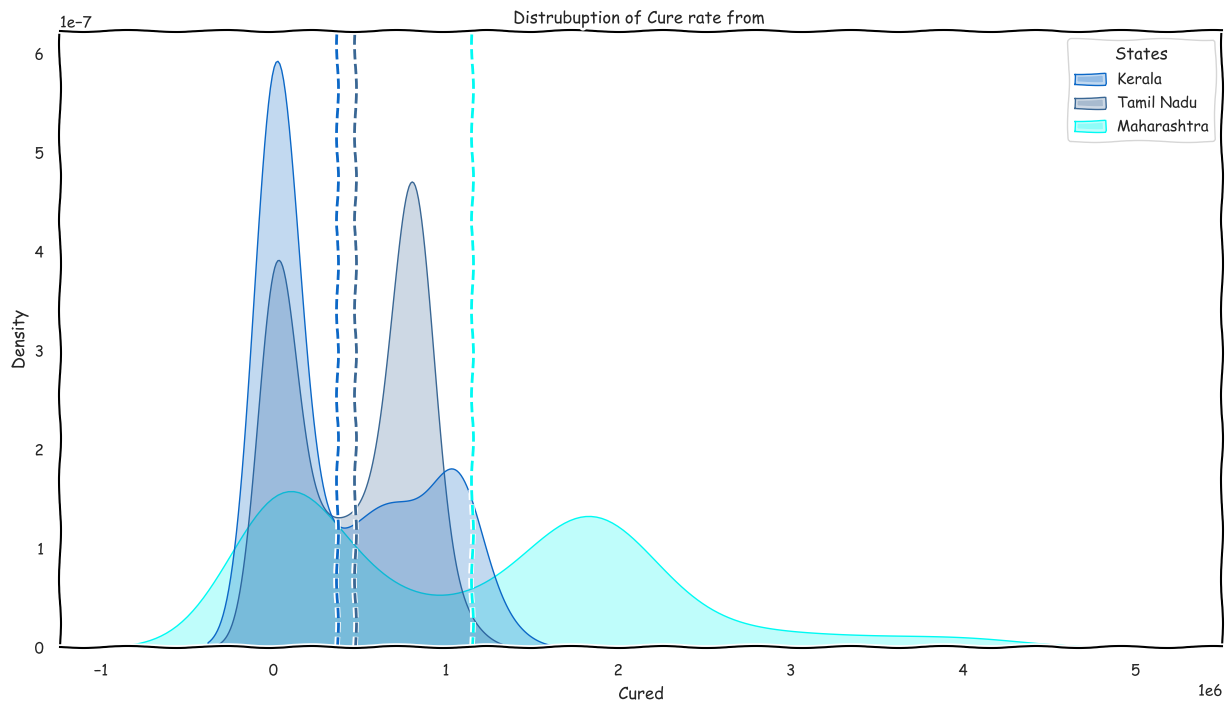

In [27]:


from scipy.stats import norm
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Distrubuption of Cure rate from ")
    ax=sns.kdeplot(data=median_states[median_states['States'].isin(['Tamil Nadu','Maharashtra','Kerala'])],x='Cured', hue='States', fill=True)
    ax.axvline(median_states[median_states['States']=='Kerala']['Cured'].mean(), ls='--', c=colors[0])
    ax.axvline(median_states[median_states['States']=='Tamil Nadu']['Cured'].mean(), ls='--', c=colors[1])
    ax.axvline(median_states[median_states['States']=='Maharashtra']['Cured'].mean(), ls='--', c=colors[2])
    



In [28]:
#lets take mean impacted vs mean cured
tn_cured = df[df['States']=='Tamil Nadu']['Deaths'].max()
mh_cured=df[df['States']=='Maharashtra']['Deaths'].max()
kl_cured=df[df['States']=='Kerala']['Deaths'].max()

tn_active = df[df['States']=='Tamil Nadu']['Confirmed'].max()
mh_active=df[df['States']=='Maharashtra']['Confirmed'].max()
kl_active=df[df['States']=='Kerala']['Confirmed'].max()

print([tn_cured, mh_cured] , [tn_active, mh_active])
print(f' Proportion of Death cases in Tamil Nadu, Maharastra = {round(tn_cured/tn_active,2)}%, {round(mh_cured/mh_active,2)}% respectively \n')

print([tn_cured, kl_cured] , [tn_active, kl_active])
print(f' Proportion of Death cases in Tamil Nadu, Kerala = {round(tn_cured/tn_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

print([mh_cured, kl_cured] , [mh_active, kl_active])
print(f' Proportion of Death cases in Tamil Nadu, Kerala = {round(mh_cured/mh_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')


stat, p_value = proportions_ztest([tn_cured, mh_cured] , [tn_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Tamil Nadu','Maharashtra'))

stat, p_value = proportions_ztest([tn_cured, kl_cured] , [tn_active, kl_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Tamil Nadu','Kerala'))

stat, p_value = proportions_ztest([kl_cured, mh_cured] , [kl_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Kerala','Maharashtra'))

[15171, 74413] [1323965, 4996758]
 Proportion of Death cases in Tamil Nadu, Maharastra = 0.01%, 0.01% respectively 

[15171, 5682] [1323965, 1824856]
 Proportion of Death cases in Tamil Nadu, Kerala = 0.01%, 0.0% respectively 

[74413, 5682] [4996758, 1824856]
 Proportion of Death cases in Tamil Nadu, Kerala = 0.01%, 0.0% respectively 

Both states Tamil Nadu & Maharashtra have significant difference in Death rate
Both states Tamil Nadu & Kerala have significant difference in Death rate
Both states Kerala & Maharashtra have significant difference in Death rate


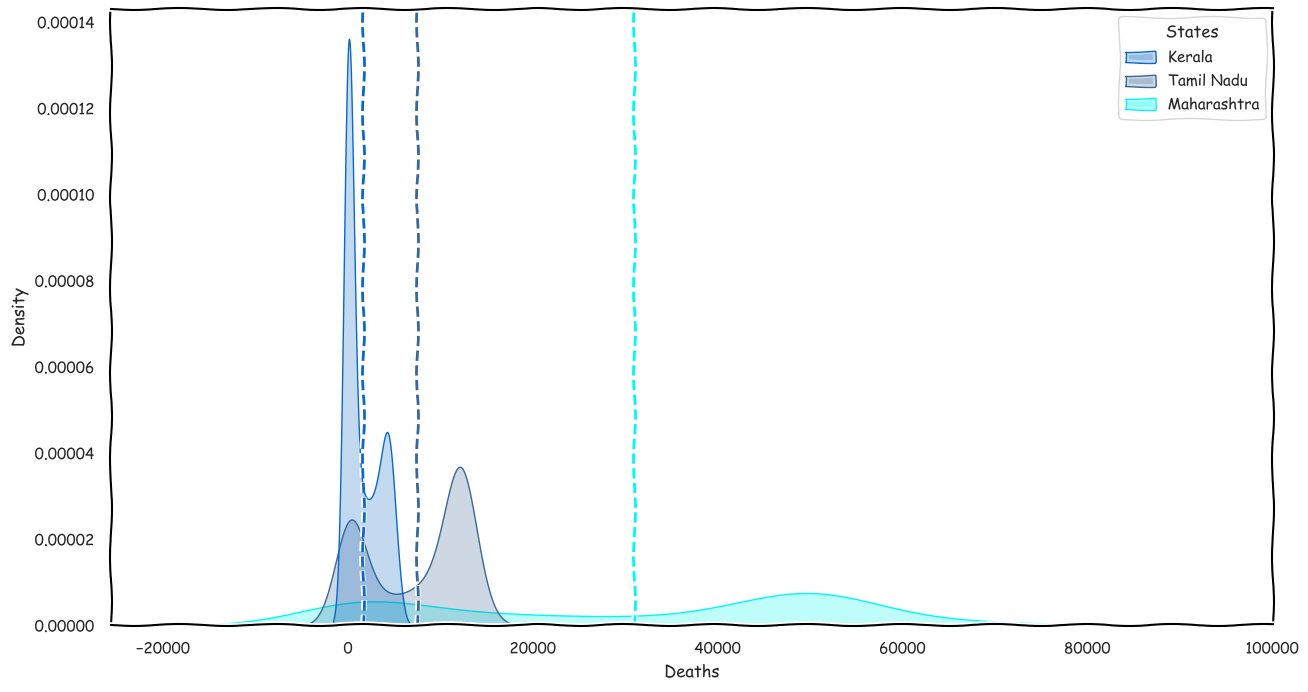

In [29]:
from scipy.stats import norm
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    ax=sns.kdeplot(data=median_states[median_states['States'].isin(['Tamil Nadu','Maharashtra','Kerala'])],x='Deaths', hue='States', fill=True)
    ax.axvline(median_states[median_states['States']=='Kerala']['Deaths'].mean(), ls='--', c=colors[0])
    ax.axvline(median_states[median_states['States']=='Tamil Nadu']['Deaths'].mean(), ls='--', c=colors[1])
    ax.axvline(median_states[median_states['States']=='Maharashtra']['Deaths'].mean(), ls='--', c=colors[2])

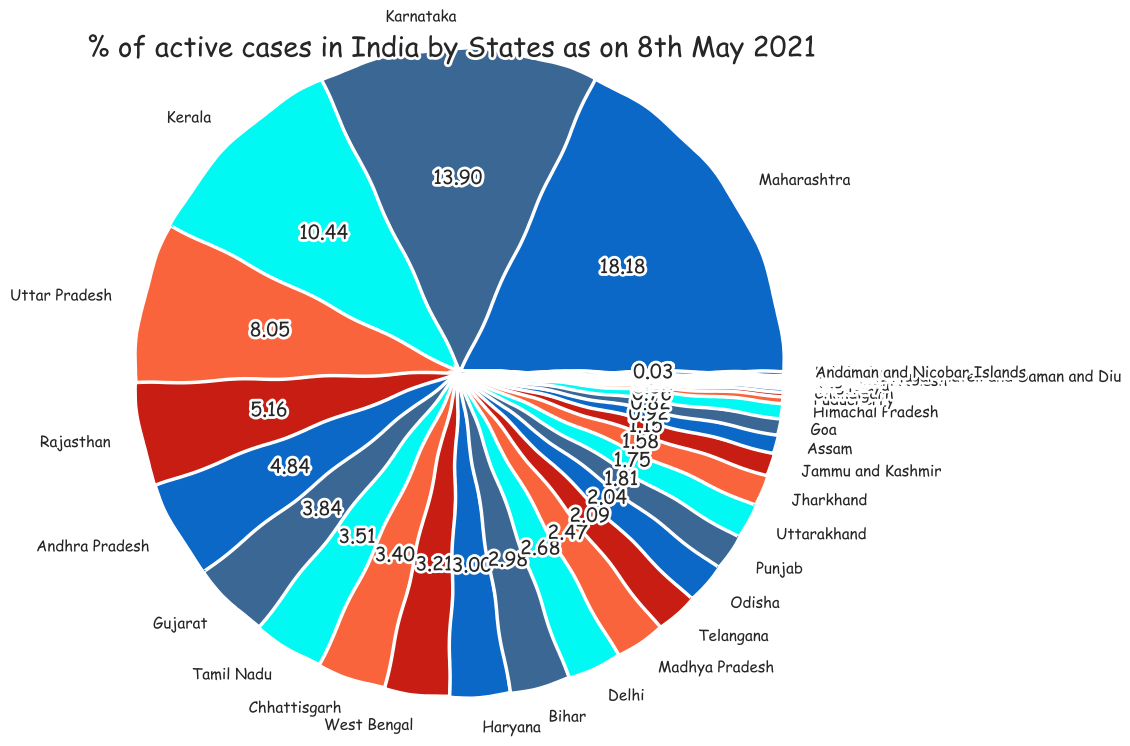

In [30]:
with plt.xkcd():
    fig=plt.figure(figsize=(7,7))
    plt.pie(x=top_10[top_10['Date']=='2021-05-08 00:00:00']['Active_cases'], labels=top_10[top_10['Date']=='2021-05-08 00:00:00']['States'], autopct='%.2f',radius=1.5);
    plt.suptitle("% of active cases in India by States as on 8th May 2021",size=20)

In [31]:
#Finding our Daily cases for the data

tn_count=df[df['States']=='Tamil Nadu']
daily=[]
daily.append(0)
for i in range(1, len(tn_count)):
    daily.append(tn_count['Confirmed'].iloc[i]-tn_count['Confirmed'].iloc[i-1])
tn_count['Daily']=daily

C:\Users\vibi\AppData\Local\Temp\ipykernel_6328\57282228.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_count['Daily']=daily


In [32]:
from prophet import Prophet

In [33]:

ds=pd.DataFrame(columns=['ds','y'])

ds['ds']=tn_count['Date']
ds['y']=tn_count['Daily']
model = Prophet(changepoint_range=1)
model.fit(ds)
future = model.make_future_dataframe(periods=20)
f=model.predict(future)
f['ds']=pd.to_datetime(f['ds'], format='%Y-%m-%d')

21:06:48 - cmdstanpy - INFO - Chain [1] start processing
21:06:48 - cmdstanpy - INFO - Chain [1] done processing


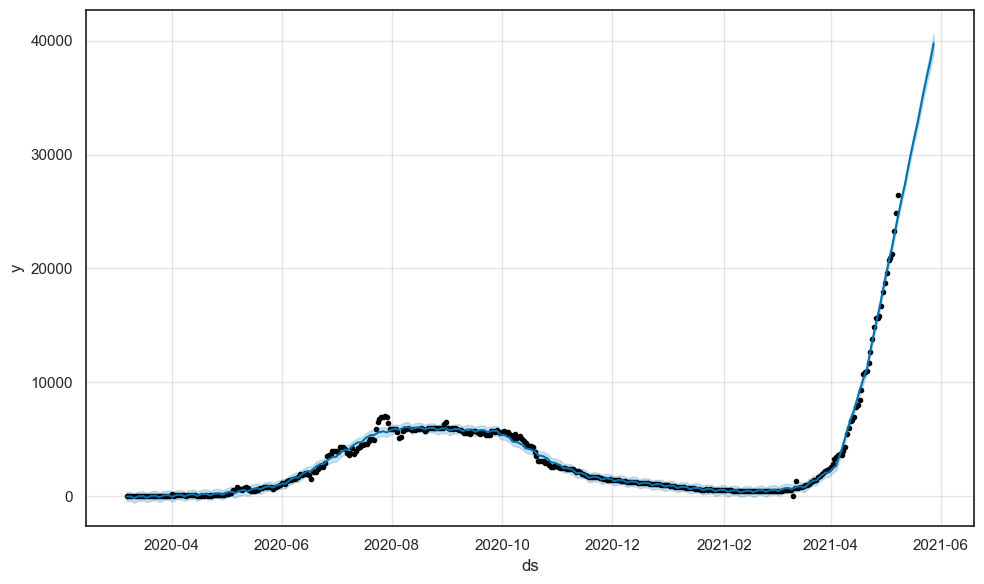

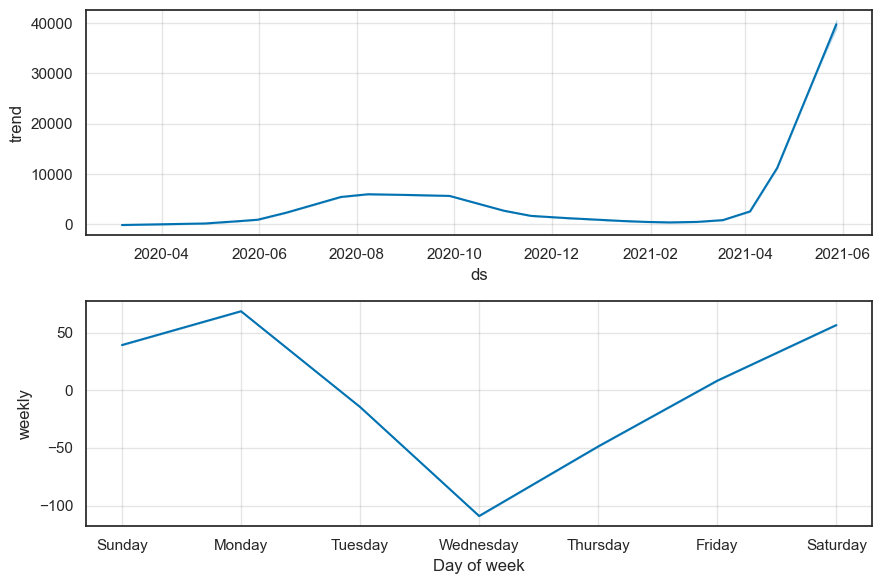

In [35]:
fig1 = model.plot(f)

fig2 = model.plot_components(f)

In [36]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, f)

plot_components_plotly(model, f)

In [38]:
f.tail()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
443 2021-05-24  36662.899773  36078.309982  37389.549997  36167.417164   
444 2021-05-25  37433.553034  36773.026988  38142.574352  36878.329972   
445 2021-05-26  38204.206294  37385.709564  38840.778453  37542.935943   
446 2021-05-27  38974.859555  38117.221078  39732.174580  38259.352370   
447 2021-05-28  39745.512815  38943.432754  40640.309047  38961.801014   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
443  37212.354889       68.419725             68.419725             68.419725   
444  38056.447407      -14.532759            -14.532759            -14.532759   
445  38883.649371     -108.976297           -108.976297           -108.976297   
446  39736.211377      -48.726233            -48.726233            -48.726233   
447  40575.534840        8.232253              8.232253              8.232253   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
443   68.419725     68.419725     68.419725                   0.0   
444  -14.532759    -14.532759    -14.532759                   0.0   
445 -108.976297   -108.976297   -108.976297                   0.0   
446  -48.726233    -48.726233    -48.726233                   0.0   
447    8.232253      8.232253      8.232253                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
443                         0.0                         0.0  36731.319498  
444                         0.0                         0.0  37419.020275  
445                         0.0                         0.0  38095.229997  
446                         0.0                         0.0  38926.133322  
447                         0.0                         0.0  39753.745069